In [5]:
import pandas as pd

# 날짜 컬럼 방지
def read_csv_auto_dates(path):
    # 1) 전체 파일을 먼저 읽기
    temp = pd.read_csv(path, low_memory=False)
    
    # 2) _at 로 끝나는 컬럼 자동 탐지
    date_cols = [col for col in temp.columns if col.endswith('_at')]
    
    # 3) 다시 날짜 컬럼을 datetime 으로 읽기
    return pd.read_csv(path, parse_dates=date_cols, low_memory=False)

# Load Files (전처리)
Acquisitions = read_csv_auto_dates("./clean_data_v1/clean_acquisitions_final.csv")
Degrees = read_csv_auto_dates("./clean_data_v1/clean_degrees_final.csv")
FundingRounds = read_csv_auto_dates("./clean_data_v1/clean_fr_final.csv")
Funds = read_csv_auto_dates("./clean_data_v1/clean_funds_final.csv")
Investments = read_csv_auto_dates("./clean_data_v1/clean_investments_final.csv")
Ipos = read_csv_auto_dates("./clean_data_v1/clean_ipos_final.csv")
Milestones = read_csv_auto_dates("./clean_data_v1/clean_milestones_final.csv")
Objects = read_csv_auto_dates("./clean_data_v1/clean_objects_final.csv")
People = read_csv_auto_dates("./clean_data_v1/clean_people_final.csv")
Offices = read_csv_auto_dates("./clean_data_v1/clean_offices_final.csv")
Relationships = read_csv_auto_dates("./clean_data_v1/clean_relationships_final.csv")

# Load Files (작업용 전처리)
company = read_csv_auto_dates("./entity_type/objects_company.csv")
finorg = read_csv_auto_dates("./entity_type/objects_finorg.csv")
person = read_csv_auto_dates("./entity_type/objects_person.csv")
product = read_csv_auto_dates("./entity_type/objects_product.csv")

# Load Files (join)
acqusitions_company = read_csv_auto_dates("./EDA's join/acqusitions_company.csv")
fr_company = read_csv_auto_dates("./EDA's join/fr_company.csv")
ipos_company = read_csv_auto_dates("./EDA's join/ipos_company.csv")
startup_system = read_csv_auto_dates("./EDA's join/startup_system.csv")

print("="*60)
print("Dataset 로드 완료!")
print("="*60)

Dataset 로드 완료!


In [6]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


# 한글 안깨지게 맥북용
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# IPO 분석 : IPO된 스타트업의 특징
- 어떤 산업이 많이 상장되었는가 ? 
    - 산업별로 평균 조달 금액은 ?
    - 연도별로 어떤 산업이 많이 ipo 되었나 ?
- 어느 도시에서 많이 상장되었는가 ?
- IPO까지 평균 소요 시간은 ? (투자 라운드별)
- 어떤 product가 IPO 되었는가 ? 
- 어떤 상장사에 많이 상장되었는가 ?
    - 상장사 별로 평균 조달 금액 ?
-ipo 됐다가 인수된 회사

IPO valuation 큰 산업


## 산업별

Text(0.5, 1.0, '산업별 ipo 건수')

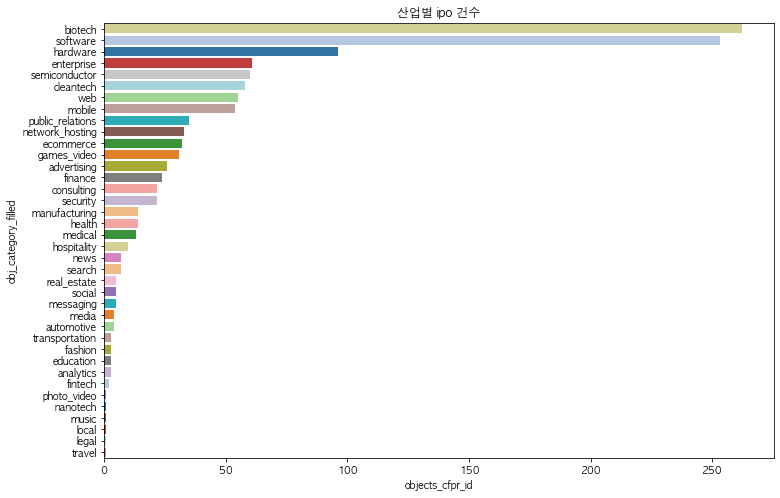

In [7]:
# 산업별 ipo 회사 수
industry_ipo_cnt = (ipos_company.groupby('obj_category_filled')['objects_cfpr_id']
                       .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False))
# 색 지정
# 1) 전체 지역 리스트
industry = ipos_company['obj_category_filled'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(industry))

# 3) obj_category_filled → color 매핑 딕셔너리
cat_palette = dict(zip(industry, base_colors))

# 시각화
plt.figure(figsize=(12, 8))

# 산업별 ipo 건수 수평 막대 그래프
sns.barplot(data=industry_ipo_cnt, x='objects_cfpr_id', y='obj_category_filled', palette=cat_palette, hue='obj_category_filled')
plt.title('산업별 ipo 건수')

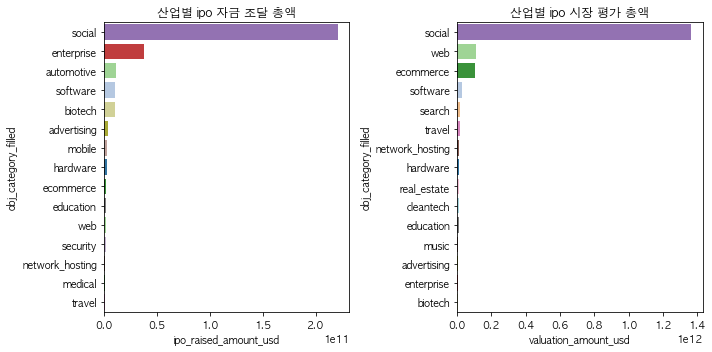

In [8]:
#############################
# 결측값이 너무 많아서 왜곡됨 ... 
#############################

# 산업별 자금 조달 총액 -> VC의 회수 금액이 아님 (시장전체 수요)
ipo_total_amount = (ipos_company.groupby('obj_category_filled')['ipo_raised_amount_usd']
                       .sum().reset_index().sort_values('ipo_raised_amount_usd', ascending=False)).head(15)

# 산업별 vc가 얻을 수 있는 수익성 (가치)
ipo_total_valuation = (ipos_company.groupby('obj_category_filled')['valuation_amount_usd']
                       .sum().reset_index().sort_values('valuation_amount_usd', ascending=False)).head(15)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 색 지정
# 1) 전체 지역 리스트
industry = ipos_company['obj_category_filled'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(industry))

# 3) obj_category_filled → color 매핑 딕셔너리
cat_palette = dict(zip(industry, base_colors))

# 산업별 ipo 자금 조달 총액 수평 막대 그래프
sns.barplot(data=ipo_total_amount, x='ipo_raised_amount_usd', y='obj_category_filled', palette=cat_palette, hue='obj_category_filled', ax=axes[0])
axes[0].set_title('산업별 ipo 자금 조달 총액')

# 산업별 ipo 시장 평가 가치급액 수평 막대 그래프 -> vc 수익성
sns.barplot(data=ipo_total_valuation, x='valuation_amount_usd', y='obj_category_filled', palette=cat_palette, hue='obj_category_filled', ax=axes[1])
axes[1].set_title('산업별 ipo 시장 평가 총액')

plt.tight_layout()
plt.show()

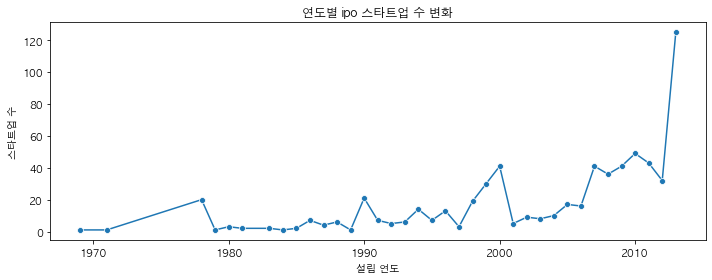

In [9]:
# 연도별로 ipo 건수
ipos_company['ipo_public_year'] = pd.to_datetime(ipos_company['public_at'], errors='coerce').dt.year

# 연도, 산업 없는 행은 제거
df_year_ind = (
    ipos_company
    .dropna(subset=['ipo_public_year', 'obj_category_filled'])
    .groupby(['ipo_public_year', 'obj_category_filled'])['objects_cfpr_id']
    .nunique()   
    .reset_index(name='new_startups')
)

year_trend = (
    df_year_ind
    .groupby('ipo_public_year')['new_startups']
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 4))
sns.lineplot(data=year_trend, x='ipo_public_year', y='new_startups', marker='o')
plt.title('연도별 ipo 스타트업 수 변화')
plt.xlabel('설립 연도')
plt.ylabel('스타트업 수')
plt.tight_layout()
plt.show()


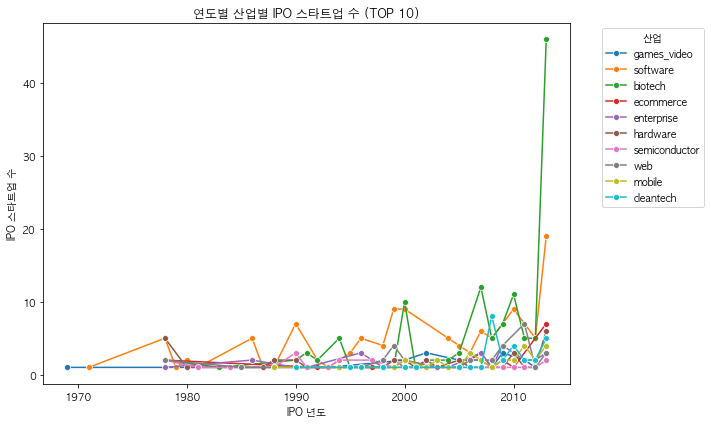

In [10]:
# 전체 기간 기준 상위 10개 산업 선정
top10_ind = (
    df_year_ind.groupby('obj_category_filled')['new_startups'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top = df_year_ind[df_year_ind['obj_category_filled'].isin(top10_ind)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_top,
    x='ipo_public_year',
    y='new_startups',
    hue='obj_category_filled',
    marker='o'
)
plt.title('연도별 산업별 IPO 스타트업 수 (TOP 10)')
plt.xlabel('IPO 년도')
plt.ylabel('IPO 스타트업 수')
plt.legend(title='산업', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### funding 효율이 높은 산업   -----> valuation_amount 의 결측이 너무 많아서 분석 사실상 불가 ..😥

ipo 효율 = IPO valuation_amount / total_funding

total_funding = funding_round 테이블에서 회사별로 raised_amount를 보면 됨

In [11]:
# 1) ipo 조달 금액
ipos_clean = ipos_company[ipos_company['valuation_amount_usd'] > 0]


# 2) 회사별 총 펀딩 금액 (원금)
total_funding = (
    ipos_company
    .groupby('ipos_c_id')['raised_amount_usd']
    .sum()
    .reset_index(name='total_funding')
    )

# 3) total_funding을 IPO 기업 테이블에 다시 merge
ipos_merged = (
    ipos_clean
    .drop_duplicates(subset=['ipos_c_id'])  # 중복 제거 (라운드별 여러 행)
    .merge(total_funding, how='left', on='ipos_c_id')
)

# 4) total_funding이 0이거나 없는 회사 제거
ipos_merged = ipos_merged[ipos_merged['total_funding'] > 0]

# 5) ipo 효율 구하기
ipos_merged['exit_multiple'] = (
    ipos_merged['valuation_amount'] / ipos_merged['total_funding']
)

# 6) 산업별 평균 ipo 효율 구하기
industry_exit_multiple = (
    ipos_merged.groupby('category_code')['exit_multiple']
               .mean()
               .reset_index()
               .sort_values('exit_multiple', ascending=False)
)


### valuation 가치 금액 공개 여부 차이 
is_ipos_valuation_private 에 따른 산업 차이

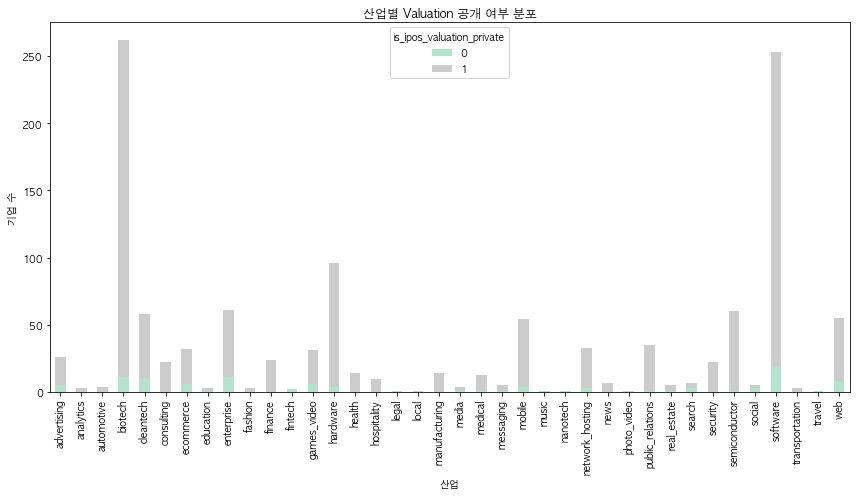

In [32]:
# 산업별 valuation 가치 금액 공개 여부 차이 

val_pivot = (
    ipos_company.groupby(['obj_category_filled', 'is_ipos_valuation_private'])['objects_cfpr_id']
    .nunique()
    .reset_index()
)

val_pivot = val_pivot.pivot(
    index='obj_category_filled',
    columns='is_ipos_valuation_private',
    values='objects_cfpr_id'
).fillna(0)

val_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Pastel2'
)

plt.title('산업별 Valuation 공개 여부 분포')
plt.xlabel('산업')
plt.ylabel('기업 수')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, '상장사별 ipo 건수')

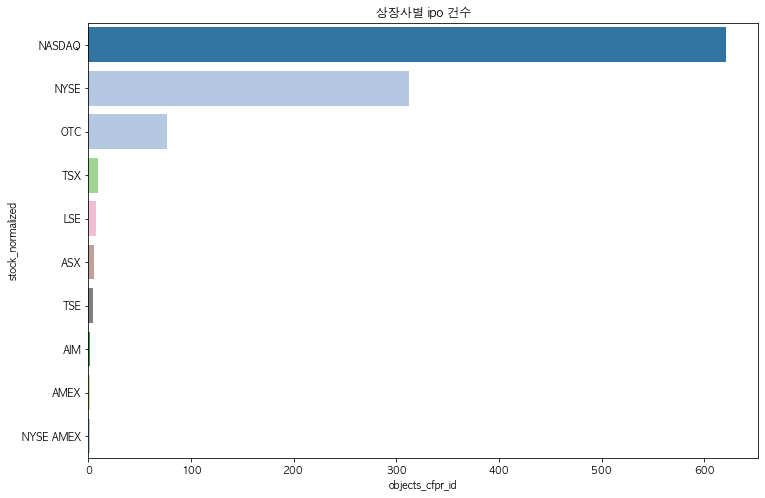

In [13]:
# 상장사 별로 ipo 회사 수 
stock_ipo_cnt = (ipos_company.groupby('stock_normalized')['objects_cfpr_id']
                       .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False)).head(10)
# 색 지정
# 1) 전체 상장 리스트
stock_normalized = ipos_company['stock_normalized'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(stock_normalized))

# 3) stock_normalized → color 매핑 딕셔너리
cat_palette = dict(zip(stock_normalized, base_colors))

# 시각화
plt.figure(figsize=(12, 8))

# 상장사 ipo 건수 수평 막대 그래프
sns.barplot(data=stock_ipo_cnt, x='objects_cfpr_id', y='stock_normalized', palette=cat_palette, hue='stock_normalized')
plt.title('상장사별 ipo 건수')

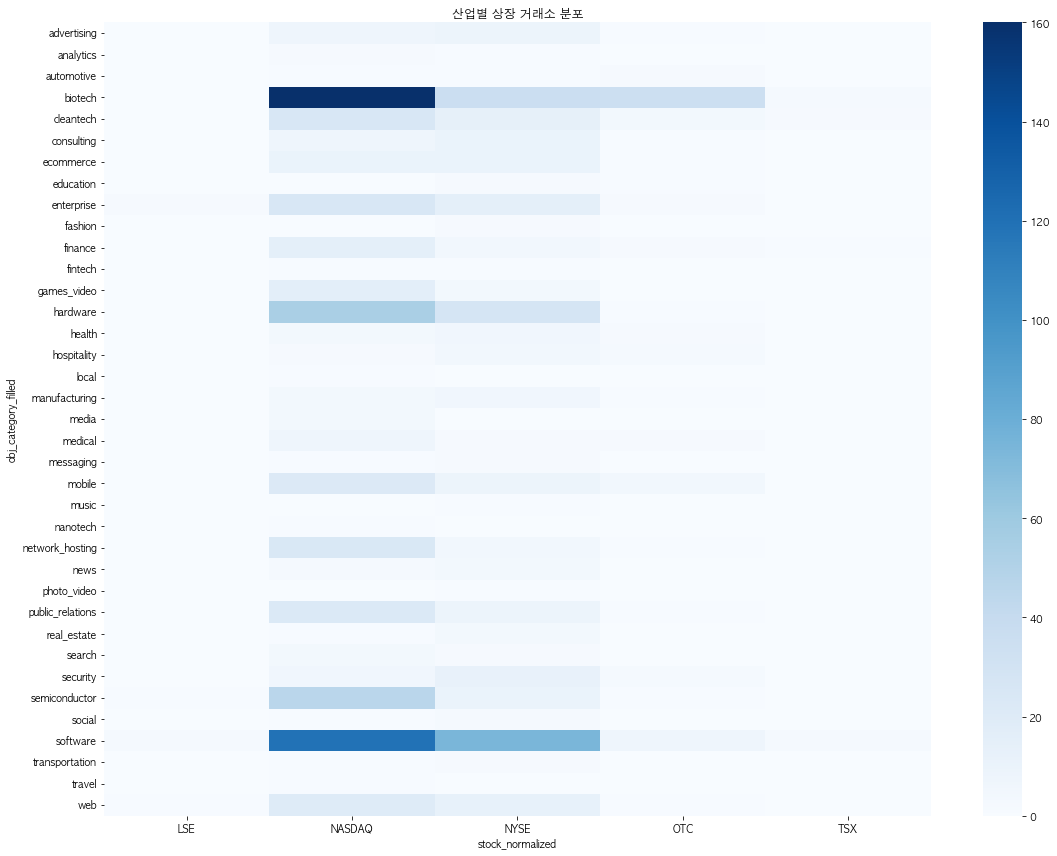

In [33]:
# 산업별로 상장하는 상장사 
industry_stock = (
    ipos_company.groupby(['obj_category_filled', 'stock_normalized'])['objects_cfpr_id']
                .nunique()
                .reset_index()
                .sort_values(['obj_category_filled', 'objects_cfpr_id'], ascending=[True, False])
)

# 거래소별 전체 IPO 회사 수 합계
top5_exchanges = (
    industry_stock.groupby('stock_normalized')['objects_cfpr_id']
                  .sum()
                  .sort_values(ascending=False)
                  .head(5)
                  .index
)
# 5개 거래소만 필터링
industry_top5_stock = industry_stock[industry_stock['stock_normalized'].isin(top5_exchanges)]

# 전체산업 x 상장사 히트맵
pivot_df = industry_top5_stock.pivot_table(
    index='obj_category_filled',
    columns='stock_normalized',
    values='objects_cfpr_id',
    fill_value=0
)

plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, cmap="Blues", annot=False)
plt.title("산업별 상장 거래소 분포")
plt.tight_layout()
plt.show()


In [34]:
# 산업별로 ipo 까지 걸린 시간

# 회사별 첫 투자일, IPO 날짜, 산업 가져오기
company_exit = (
    ipos_company
    .groupby('ipos_c_id')
    .agg(
        first_funded_at = ('funded_at', 'min'),
        ipo_at          = ('public_at', 'max'),
        obj_category_filled   = ('obj_category_filled', 'first')
    )
    .reset_index()
)

# 회사별 ipo 까지 걸린 시간 
company_exit['time_to_ipo_days']  = (company_exit['ipo_at'] - company_exit['first_funded_at']).dt.days
company_exit['time_to_ipo_years'] = company_exit['time_to_ipo_days'] / 365

# ipo 날짜 이상한 값 삭제 (이상값)
company_exit = company_exit[
    company_exit['time_to_ipo_years'].notna() & (company_exit['time_to_ipo_years'] > 0)
]

# 산업별 평균 ipo 까지 걸린 시간
industry_time_to_ipo = (
    company_exit
    .groupby('obj_category_filled')['time_to_ipo_years']
    .mean()
    .reset_index()
    .sort_values('time_to_ipo_years')
)


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13686/3592162891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


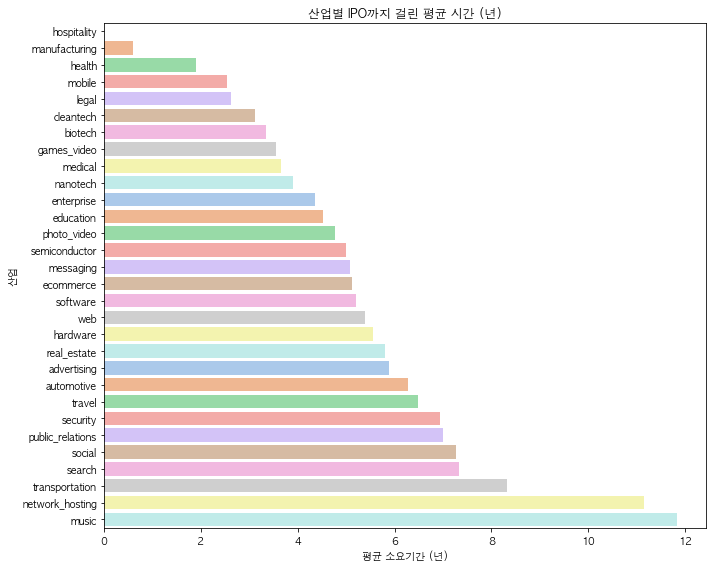

In [35]:
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(
    data=industry_time_to_ipo,
    x='time_to_ipo_years',
    y='obj_category_filled',
    palette='pastel'
)
plt.title('산업별 IPO까지 걸린 평균 시간 (년)')
plt.xlabel('평균 소요기간 (년)')
plt.ylabel('산업')
plt.tight_layout()
plt.show()

In [17]:
# # ipo까지 투자라운드별 평균적으로 소요되는 시간

# # 회사별 첫 투자일, IPO 날짜, 산업 가져오기
# company_exit = (
#     ipos_company
#     .groupby('ipos_c_id')
#     .agg(
#         first_funded_at = ('funded_at', 'min'),
#         ipo_at          = ('public_at', 'max'),
#         funding_round_type   = ('funding_round_type', 'first')
#     )
#     .reset_index()
# )

# # 회사별 ipo 까지 걸린 시간 
# company_exit['time_to_ipo_days']  = (company_exit['ipo_at'] - company_exit['first_funded_at']).dt.days
# company_exit['time_to_ipo_years'] = company_exit['time_to_ipo_days'] / 365

# # ipo 날짜 이상한 값 삭제 (이상값)
# company_exit = company_exit[
#     company_exit['time_to_ipo_years'].notna() & (company_exit['time_to_ipo_years'] > 0)
# ]

# # 산업별 평균 ipo 까지 걸린 시간
# industry_time_to_ipo = (
#     company_exit
#     .groupby('funding_round_type')['time_to_ipo_years']
#     .mean()
#     .reset_index()
#     .sort_values('time_to_ipo_years')
# )


In [18]:
# 회사별 첫 투자 시점
first_funding = (
    ipos_company.groupby('fr_c_id')['funded_at']
    .min()
    .reset_index(name='first_funded_at')
)

# 각 회사 x 라운드 도달 시점
round_reached = (
    ipos_company
    .groupby(['fr_c_id', 'cat_fr_type'])['funded_at']
    .min()
    .reset_index()
)

# 기준점부터 걸린 시간 계산
round_reached = round_reached.merge(first_funding, on='fr_c_id')

round_reached['years_to_round'] = (
    round_reached['funded_at'] - round_reached['first_funded_at']
).dt.days / 365

# ipo 회사 기준 라운드별 평균 소요 시간
avg_time_by_round = (
    round_reached
    .groupby('cat_fr_type')['years_to_round']
    .mean()
    .reset_index()
)


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13686/618664254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


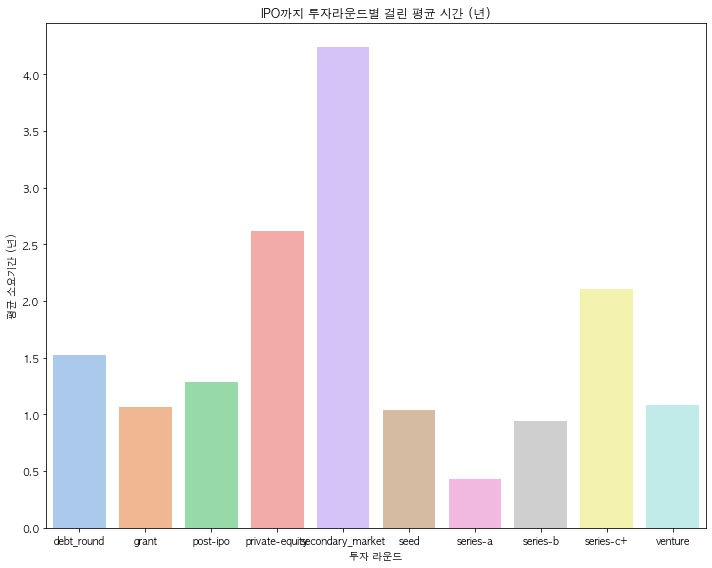

In [19]:
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(
    data=avg_time_by_round,
    x='cat_fr_type',
    y='years_to_round',
    palette='pastel'
)
plt.title('IPO까지 투자라운드별 걸린 평균 시간 (년)')
plt.ylabel('평균 소요기간 (년)')
plt.xlabel('투자 라운드')
plt.tight_layout()
plt.show()

## 도시별

Text(0.5, 1.0, '도시별 ipo 회사수')

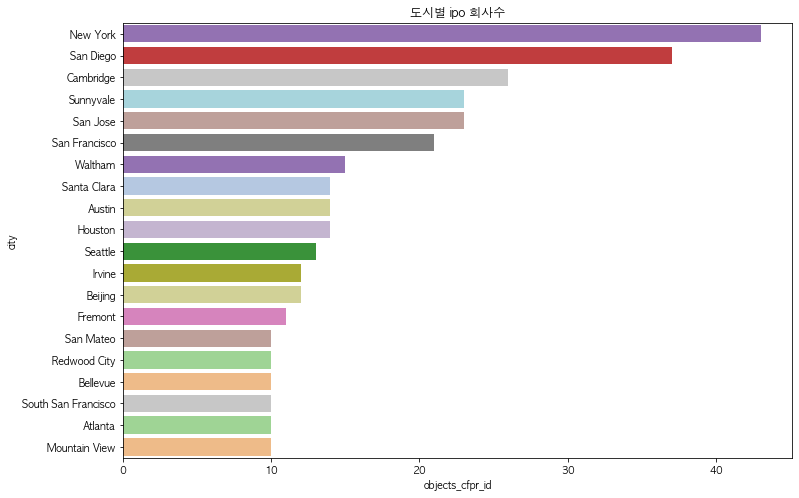

In [20]:
# 도시별 ipo 회사 수
city_ipo_cnt = (ipos_company.groupby('city')['objects_cfpr_id']
                       .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False)).head(20)
# 색 지정
# 1) 전체 지역 리스트
city = ipos_company['city'].unique()

# 2) 도시 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(city))

# 3) city → color 매핑 딕셔너리
cat_palette = dict(zip(city, base_colors))

# 시각화
plt.figure(figsize=(12, 8))

# 도시별 ipo 회사 수 수평 막대 그래프
sns.barplot(data=city_ipo_cnt, x='objects_cfpr_id', y='city', palette=cat_palette, hue='city')
plt.title('도시별 ipo 회사수' )

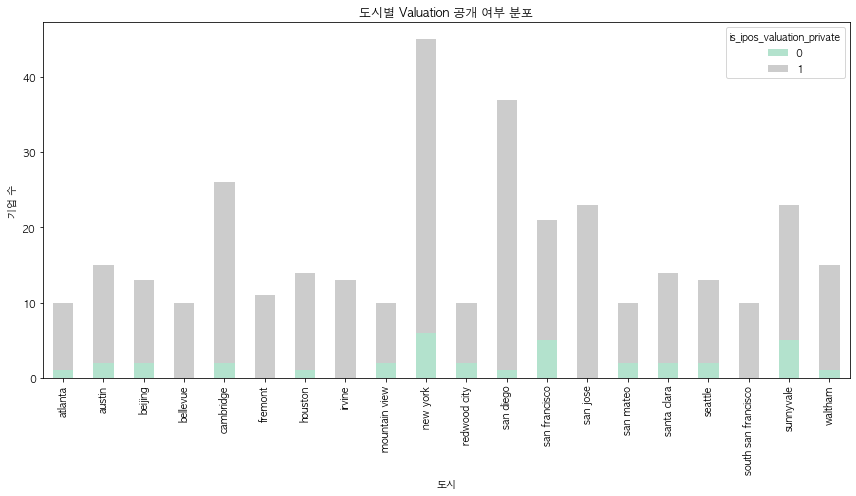

In [21]:
# 도시별 valuation 가치 금액 공개 여부 차이 

val_pivot = (
    ipos_company.groupby(['obj_city_fixed', 'is_ipos_valuation_private'])['objects_cfpr_id']
    .nunique()
    .reset_index()
)
# 도시별 IPO 기업수 기준 top10 도시 선정
top10_city = (
    ipos_company.groupby('obj_city_fixed')['objects_cfpr_id']
    .nunique()
    .sort_values(ascending=False)
    .head(20)
    .index
)
# 이 10개 도시만 필터링
val_city = ipos_company[ipos_company['obj_city_fixed'].isin(top10_city)]

# 공개/비공개 카운트 pivot 생성
val_pivot = (
    val_city.groupby(['obj_city_fixed', 'is_ipos_valuation_private'])['objects_cfpr_id']
    .nunique()
    .reset_index()
)

val_pivot = val_pivot.pivot(
    index='obj_city_fixed',
    columns='is_ipos_valuation_private',
    values='objects_cfpr_id'
).fillna(0)

# 시각화
val_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Pastel2'
)

plt.title('도시별 Valuation 공개 여부 분포')
plt.xlabel('도시')
plt.ylabel('기업 수')
plt.tight_layout()
plt.show()


In [22]:
# 도시별로 ipo 까지 걸린 시간

# 회사별 첫 투자일, IPO 날짜, 도시 가져오기
company_exit = (
    ipos_company
    .groupby('ipos_c_id')
    .agg(
        first_funded_at = ('funded_at', 'min'),
        ipo_at          = ('public_at', 'max'),
        city   = ('obj_city_fixed', 'first')
    )
    .reset_index()
)

# 회사별 ipo 까지 걸린 시간 
company_exit['time_to_ipo_days']  = (company_exit['ipo_at'] - company_exit['first_funded_at']).dt.days
company_exit['time_to_ipo_years'] = company_exit['time_to_ipo_days'] / 365

# ipo 날짜 이상한 값 삭제 (이상값)
company_exit = company_exit[
    company_exit['time_to_ipo_years'].notna() & (company_exit['time_to_ipo_years'] > 0)
]

# 도시별 평균 ipo 까지 걸린 시간
city_time_to_ipo = (
    company_exit
    .groupby('city')['time_to_ipo_years']
    .mean()
    .reset_index()
    .sort_values('time_to_ipo_years')
)


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13686/1196932298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


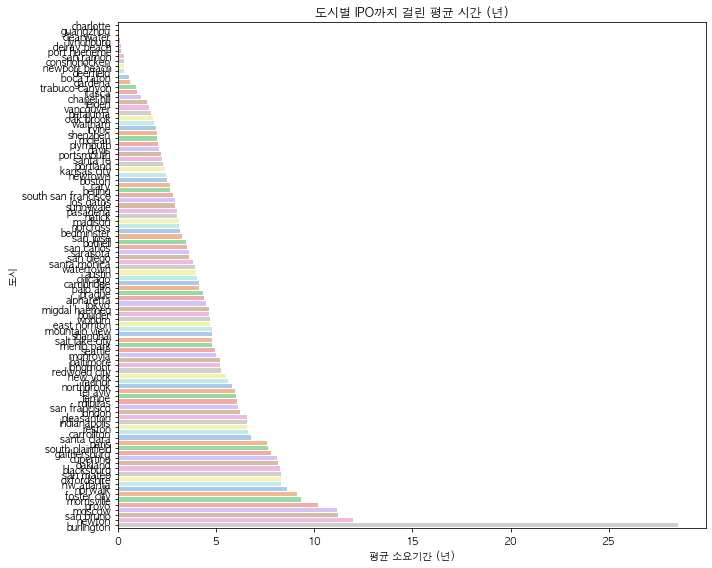

In [23]:
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(
    data=city_time_to_ipo,
    x='time_to_ipo_years',
    y='city',
    palette='pastel'
)
plt.title('도시별 IPO까지 걸린 평균 시간 (년)')
plt.xlabel('평균 소요기간 (년)')
plt.ylabel('도시')
plt.tight_layout()
plt.show()

### 제품별

In [24]:
# 제품별 ipo 분포

# ipo -> product ←> funding_rounds merge
company_product = (
    Ipos
    .merge(product, how='left', left_on='ipos_c_id', right_on='parent_c_id')
    .merge(FundingRounds, how='left', left_on='parent_c_id', right_on='fr_c_id')
)

In [25]:
product

,objects_cfpr_id,entity_type,parent_c_id,normalized_name,status,founded_at,closed_at,overview,tag_list,first_milestone_at,...,is_obj_parent_id_missing,is_obj_founded_missing,is_obj_closed_missing,is_obj_overview_missing,obj_overview_fixed,cat_obj_overview,obj_city_fixed,obj_category_filled,is_obj_funding_total_usd_private,is_obj_funding_rounds_private
0,r:1,Product,c:1,wikison wetpaint,live,2006-06-01,NaT,Wikis on Wetpaint is a hosted wiki platform.,wiki,NaT,...,0,0,1,0,wikis on wetpaint is a hosted wiki platform,Software & Technology,NaN,software,0,0
1,r:10,Product,c:16,slacker web player,operating,2007-06-05,NaT,NaN,wiki,NaT,...,0,0,1,1,NaN,Software & Technology,NaN,software,0,0
2,r:100,Product,c:1585,vemo enterprise workforce planning,live,2008-07-01,NaT,NaN,enterprise,NaT,...,0,0,1,1,NaN,Software & Technology,NaN,software,0,0
3,r:10002,Product,c:14171,dexmo study and revision network,operating,NaT,NaT,NaN,NaN,NaT,...,0,1,1,1,NaN,Software & Technology,NaN,software,0,0
4,r:10003,Product,c:14173,virtual pbx parachute,operating,NaT,NaT,NaN,NaN,NaT,...,0,1,1,1,NaN,Software & Technology,NaN,software,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27731,r:9995,Product,c:14164,sitelink listing feed for brokerages,operating,NaT,NaT,NaN,NaN,NaT,...,0,1,1,1,NaN,Software & Technology,NaN,software,0,0
27732,r:9996,Product,c:14164,edclink listing feed for economic development ...,operating,NaT,NaT,NaN,NaN,NaT,...,0,1,1,1,NaN,Software & Technology,NaN,software,0,0
27733,r:9997,Product,c:14164,cmail broadcast email marketing,operating,NaT,NaT,NaN,NaN,NaT,...,0,1,1,1,NaN,Software & Technology,NaN,software,0,0
27734,r:9998,Product,c:14164,catylistcrm contact database,operating,NaT,NaT,NaN,NaN,NaT,...,0,1,1,1,NaN,Software & Technology,NaN,software,0,0


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13686/4141078857.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_ipo_cnt, x='n_products', y='ipo_company_cnt', palette='pastel')


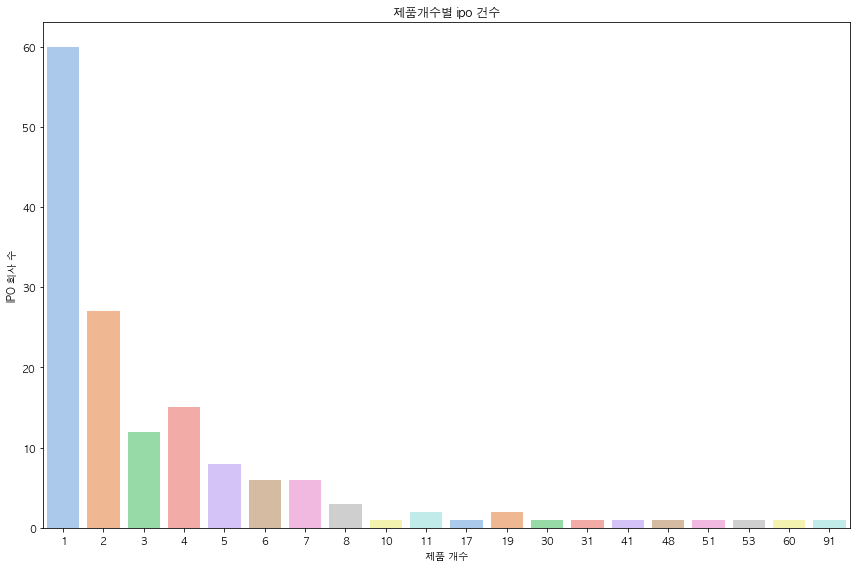

In [26]:
# 제품개수별 ipo 분포

# 제품개수별 회사 수
company_level = (
    company_product
    .groupby('parent_c_id')
    .agg(
        n_products = ('objects_cfpr_id', 'nunique'),     # 회사가 가진 제품 개수
        n_rounds   = ('funding_round_id', 'nunique')       # 그 회사의 투자 라운드 개수
    )
    .reset_index()
)
# 제품개수별 IPO 회사 수
product_ipo_cnt = (
    company_level
    .groupby('n_products')['parent_c_id']
    .nunique()  # 회사 수
    .reset_index(name='ipo_company_cnt')
    .sort_values('ipo_company_cnt', ascending=False)
)

# 시각화
plt.figure(figsize=(12, 8))

# 제품개수별 ipo 건수 수평 막대 그래프
sns.barplot(data=product_ipo_cnt, x='n_products', y='ipo_company_cnt', palette='pastel')
plt.title('제품개수별 ipo 건수')
plt.xlabel('제품 개수')
plt.ylabel('IPO 회사 수')
plt.tight_layout()
plt.show()

### 투자 라운드별

grant 받은 회사들 중 ipo 된 회사 수

Text(0.5, 1.0, '투자라운드별 ipo 건수')

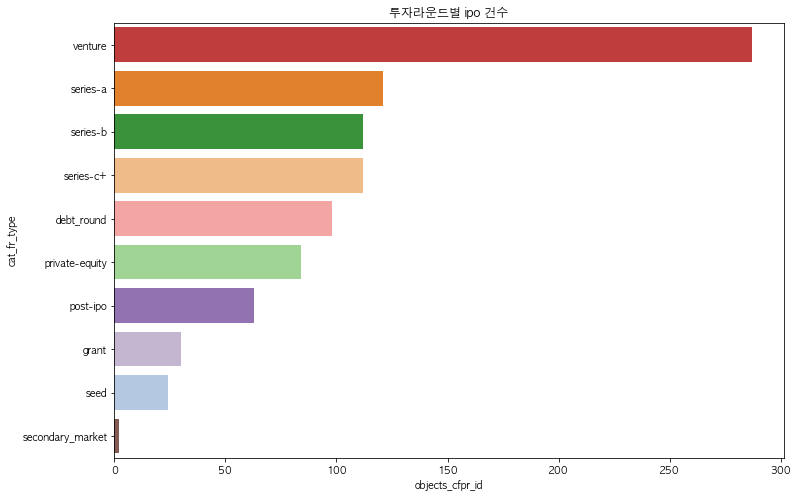

In [27]:
# 투자라운드 별 ipo 된 회사 수
  
# 투자라운드별 ipo 회사 수
round_ipo_cnt = (ipos_company.groupby('cat_fr_type')['objects_cfpr_id']
                       .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False))
# 색 지정
# 1) 전체 지역 리스트
industry = ipos_company['cat_fr_type'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(industry))

# 3) cat_fr_type → color 매핑 딕셔너리
cat_palette = dict(zip(industry, base_colors))

# 시각화
plt.figure(figsize=(12, 8))

# 투자라운드별 ipo 건수 수평 막대 그래프
sns.barplot(data=round_ipo_cnt, x='objects_cfpr_id', y='cat_fr_type', palette=cat_palette, hue='cat_fr_type')
plt.title('투자라운드별 ipo 건수')

## 고부가가치 ipo 산업

In [28]:
ipos_company

,ipo_id,ipos_c_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,is_ipos_public_at_missing,stock_normalized,...,participants,is_first_round,is_last_round,funded_year,funded_quarter,cat_fr_type,num_fr_type,log_participants,is_fr_raised_private,ipo_public_year
0,1,c:1654,NaN,USD,NaN,USD,1980-12-19,NASDAQ:AAPL,0,NASDAQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980.0
1,2,c:1242,NaN,USD,NaN,NaN,1986-03-13,NASDAQ:MSFT,0,NASDAQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0
2,3,c:342,NaN,USD,NaN,NaN,1969-06-09,NYSE:DIS,0,NYSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969.0
3,4,c:59,NaN,USD,NaN,NaN,2004-08-25,NASDAQ:GOOG,0,NASDAQ,...,1.0,0.0,1.0,1998.0,1998Q3,seed,0.0,0.693147,0.0,2004.0
4,4,c:59,NaN,USD,NaN,NaN,2004-08-25,NASDAQ:GOOG,0,NASDAQ,...,2.0,1.0,0.0,1999.0,1999Q2,series-a,1.0,1.098612,0.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,1374,c:220208,NaN,USD,2.350000e+09,USD,2008-12-08,NYSE:HLT,0,NYSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0
2046,1375,c:243568,NaN,USD,NaN,USD,NaT,OTC:BCLI,1,OTC,...,0.0,0.0,1.0,2012.0,2012Q3,seed,0.0,0.000000,0.0,NaN
2047,1375,c:243568,NaN,USD,NaN,USD,NaT,OTC:BCLI,1,OTC,...,0.0,1.0,0.0,2013.0,2013Q4,grant,99.0,0.000000,0.0,NaN
2048,1376,c:235945,NaN,USD,5.300000e+07,USD,NaT,NASDAQ:KIN,1,NASDAQ,...,0.0,0.0,1.0,2012.0,2012Q4,venture,99.0,0.000000,0.0,NaN


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13686/3881725125.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


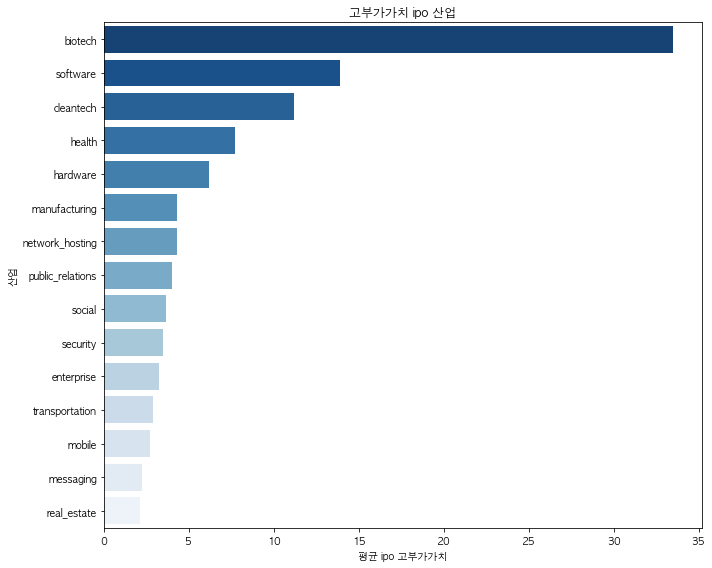

In [29]:
# 원금 계산 
total_invested = (ipos_company.groupby('ipos_c_id')
                   .agg(
                       total_funding = ('raised_amount_usd', 'sum'), # 투자 받은 금액
                       price_amount = ('ipo_raised_amount_usd', 'first'), # ipo 금액
                       category_code = ('category_code', 'first') 
                   )
                   .reset_index()
                   .sort_values('total_funding', ascending=False)
)

# 0 또는 결측 제거
total_invested = total_invested[
    total_invested['total_funding'].notna() & 
    (total_invested['total_funding'] > 0) &
    total_invested['price_amount'].notna() & 
    (total_invested['price_amount'] > 0)
]

# Exit 가치 계산
total_invested['exit_multiple'] = total_invested['price_amount'] / total_invested['total_funding']

# 산업별 고부가가치 ipo
acq_industry_multiple = (
    total_invested
    .groupby('category_code')['exit_multiple']
    .mean()
    .reset_index()
    .sort_values('exit_multiple', ascending=False)
)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=acq_industry_multiple.head(15),
    x='exit_multiple',
    y='category_code',
    palette='Blues_r'
)
plt.title('고부가가치 ipo 산업')
plt.xlabel('평균 ipo 고부가가치')
plt.ylabel('산업')
plt.tight_layout()
plt.show()


In [30]:
Ipos

,ipo_id,ipos_c_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,is_ipos_public_at_missing,stock_normalized,is_ipos_valuation_private,valuation_amount_usd,valuation_currency_rate,is_ipos_raised_private,ipo_raised_amount_usd,ipo_raised_currency_rate
0,1,c:1654,NaN,USD,NaN,USD,1980-12-19,NASDAQ:AAPL,0,NASDAQ,1,NaN,1.0,1,NaN,1.0
1,2,c:1242,NaN,USD,NaN,NaN,1986-03-13,NASDAQ:MSFT,0,NASDAQ,1,NaN,1.0,1,NaN,NaN
2,3,c:342,NaN,USD,NaN,NaN,1969-06-09,NYSE:DIS,0,NYSE,1,NaN,1.0,1,NaN,NaN
3,4,c:59,NaN,USD,NaN,NaN,2004-08-25,NASDAQ:GOOG,0,NASDAQ,1,NaN,1.0,1,NaN,NaN
4,5,c:317,1.000000e+11,USD,NaN,NaN,1997-05-01,NASDAQ:AMZN,0,NASDAQ,0,1.000000e+11,1.0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1372,c:267859,NaN,USD,NaN,USD,NaT,NYSE:EBS,1,NYSE,1,NaN,1.0,1,NaN,1.0
1255,1373,c:39330,NaN,USD,7.250000e+08,USD,2013-12-11,NYSE:ARMK,0,NYSE,1,NaN,1.0,0,7.250000e+08,1.0
1256,1374,c:220208,NaN,USD,2.350000e+09,USD,2008-12-08,NYSE:HLT,0,NYSE,1,NaN,1.0,0,2.350000e+09,1.0
1257,1375,c:243568,NaN,USD,NaN,USD,NaT,OTC:BCLI,1,OTC,1,NaN,1.0,1,NaN,1.0


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13686/2894425081.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


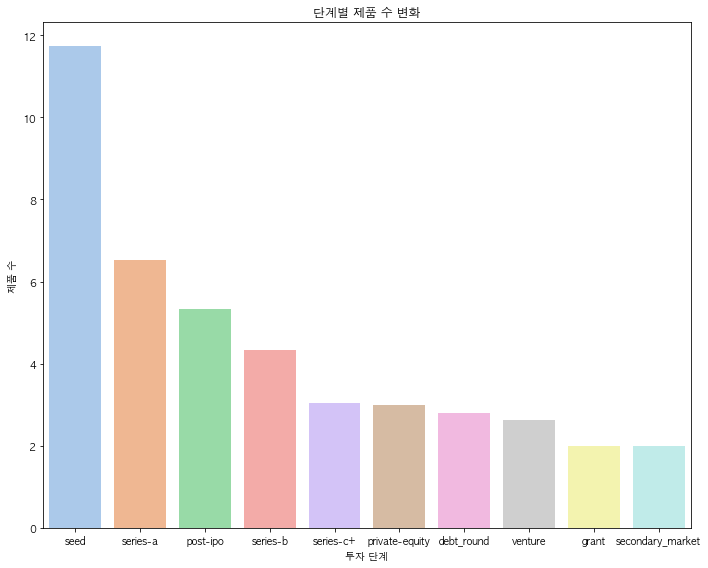

In [31]:
# ipo의 투자라운드 별 회사 제품 갯수 변화
# product ←> funding_rounds merge
ipo_company_product = (
    Ipos
    .merge(product, how='left', left_on='ipos_c_id', right_on='parent_c_id')
    .merge(FundingRounds, how='left', left_on='parent_c_id', right_on='fr_c_id')
)

# 회사별 제품 개수 계산
company_product_cnt = (
    ipo_company_product
    .groupby('parent_c_id')['objects_cfpr_id']
    .nunique()
    .reset_index(name='n_products')
)
# 3) 투자 라운드 테이블에 회사별 제품 수 붙이기
fr_with_products = (
    FundingRounds
    .merge(company_product_cnt, how='left',
           left_on='fr_c_id', right_on='parent_c_id')
)

# 4) 라운드 단계별 평균 제품 수
round_product_trend = (
    fr_with_products
    .groupby('cat_fr_type')['n_products']
    .mean()
    .reset_index()
    .sort_values('n_products', ascending=False)
)

# 시각화 
plt.figure(figsize=(10, 8))
sns.barplot(
    data=round_product_trend,
    x='cat_fr_type',
    y='n_products',
    palette='pastel'
)
plt.title('단계별 제품 수 변화')
plt.xlabel('투자 단계')
plt.ylabel('제품 수')
plt.tight_layout()
plt.show()
